In this notebook we showcase an example of the following:

* How to use a custom environment defined with same structure as OpenAI Gym environments

In [1]:
import sys
sys.path.insert(0,'../')
from myenvs import gridworld
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
rc('text', usetex=True)

import pdb

## Generating and travelling in a gridworld environment
* You recieve a -1 reward for every step you take in this world. 
* There are two terminal states each with 0 reward. 
* The goal is to accumulate as less negative reward as possible

down 6 5
down 5 4
down 4 4
down 4 4
down 4 4
left 4 0
left 0 0
right 0 0
right 0 0
down 0 0
Total Reward: -5


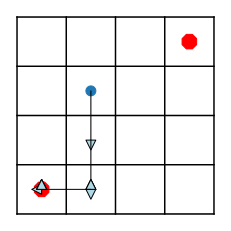

In [2]:
%config InlineBackend.figure_format = 'svg'

gw = gridworld.DetermGridWorld(size=[4,4])
gw.reset()
gw.ax.scatter(gw.flatgrid[gw.initialstate][0],gw.flatgrid[gw.initialstate][1],s=100)
actions = ['right', 'left', 'up', 'down']
for _ in range(10):
    act = np.random.randint(4, size=1)[0]
    gw.step(act) # take a random action
    print(actions[act],gw.oldstate,gw.newstate)
    gw.render()
print('Total Reward: {}'.format(gw.cumlreward))
plt.show()

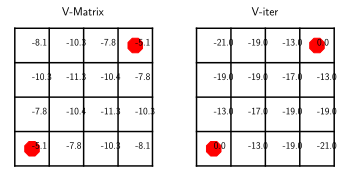

In [3]:
from solvers import dp
DP = dp.dp(gw)
policy = np.ones([gw.nS, gw.nA]) / gw.nA
VpiMat = DP.policy_evaluation(policy,theta=1e-2,usematrix=True)
VpiIter = DP.policy_evaluation(policy,theta=1e-5,usematrix=False)
plt.figure()
ax1 = plt.subplot(121)
gw._plotenv()
for ind,state in enumerate(gw.flatgrid):
    ax1.text(state[0],state[1],'{0:.1f}'.format(VpiMat[ind][0]))
plt.title('V-Matrix')
ax2 = plt.subplot(122)
gw._plotenv()
for ind,state in enumerate(gw.flatgrid):
    tax = ax2.text(state[0],state[1],'{0:.1f}'.format(VpiIter[ind][0]))
    tax.fontsize = 5
    tax.usetex = True
plt.title('V-iter')
plt.show()

In [4]:
def plot_final_values(Pi,V, env):
    actions = gw.actions
    plt.figure()
    ax1 = plt.subplot(121)
    env._plotenv()

    for ind,state in enumerate(gw.flatgrid):
        ax1.text(state[0],state[1],'{0:.1f}'.format(V[ind][0]))
    plt.title(r'$V_{\pi}^*$')

    ax2 = plt.subplot(122)
    env._plotenv()

    for ind,state in enumerate(gw.flatgrid):
        ax2.text(state[0],state[1],actions[PiStar[ind]])
    plt.title(r'$\pi^*$')
    plt.tight_layout()

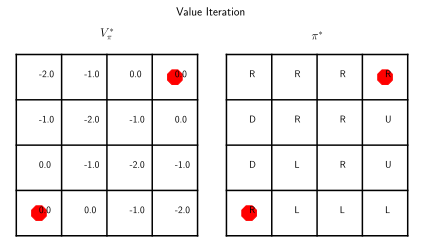

In [5]:
PiStar,VPiStar = DP.value_iteration()
plot_final_values(PiStar,VPiStar, gw)
plt.suptitle('Value Iteration', fontsize=12)
plt.show()

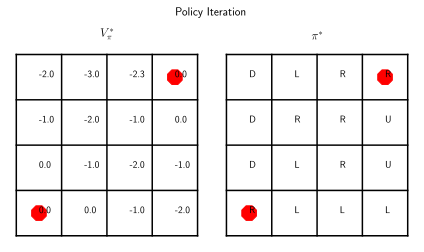

In [8]:
PiStar,VPiStar = DP.policy_iteration()
plot_final_values(PiStar,VPiStar, gw)
plt.suptitle('Policy Iteration', fontsize=12)
plt.show()